In [2]:
#%matplotlib notebook

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# getting data from csv file after cleaning up raw data 
file = "food_access_research_atlas.csv"

food_desert_df = pd.read_csv(file)
food_desert_df

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72859,56043000200,Wyoming,Washakie,0,3326,1317,0,57,0.017138,0,...,593,3106,6,15,0,27,172,309,56,116
72860,56043000301,Wyoming,Washakie,1,2665,1154,0,10,0.003752,0,...,399,2377,5,23,0,40,220,446,114,124
72861,56043000302,Wyoming,Washakie,1,2542,1021,0,73,0.028717,0,...,516,2312,11,10,1,26,182,407,82,97
72862,56045951100,Wyoming,Weston,0,3314,1322,0,252,0.076041,0,...,499,3179,15,10,1,47,62,91,108,50


In [5]:
# reading column for data set 
food_desert_df.columns

Index(['CensusTract', 'State', 'County', 'Urban', 'POP2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'],
      dtype='object', length=147)

In [6]:
# Getting certain column for analysis
food_desert_clean = food_desert_df.loc[:,["CensusTract","State","County","POP2010","LowIncomeTracts","LATracts_half","LATracts1","LATracts10","LATracts20"]]
food_desert_clean

,CensusTract,State,County,POP2010,LowIncomeTracts,LATracts_half,LATracts1,LATracts10,LATracts20
0,1001020100,Alabama,Autauga,1912,0,1,1,0,0
1,1001020200,Alabama,Autauga,2170,0,1,0,0,0
2,1001020300,Alabama,Autauga,3373,0,1,1,0,0
3,1001020400,Alabama,Autauga,4386,0,1,1,0,0
4,1001020500,Alabama,Autauga,10766,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
72859,56043000200,Wyoming,Washakie,3326,0,0,0,1,1
72860,56043000301,Wyoming,Washakie,2665,1,1,0,0,0
72861,56043000302,Wyoming,Washakie,2542,0,1,0,0,0
72862,56045951100,Wyoming,Weston,3314,0,0,0,1,0


In [7]:
# cleaing my dataset further
del food_desert_clean["CensusTract"]
del food_desert_clean["County"]

In [8]:
food_desert_clean.head()

,State,POP2010,LowIncomeTracts,LATracts_half,LATracts1,LATracts10,LATracts20
0,Alabama,1912,0,1,1,0,0
1,Alabama,2170,0,1,0,0,0
2,Alabama,3373,0,1,1,0,0
3,Alabama,4386,0,1,1,0,0
4,Alabama,10766,0,1,1,0,0


In [9]:
# grouping data set by state as data set was per county
food_desert_clean_state=food_desert_clean.groupby("State").sum()

food_desert_clean_state.head(100)

,POP2010,LowIncomeTracts,LATracts_half,LATracts1,LATracts10,LATracts20
State,,,,,,
Alabama,4779736,627,616,414,76,0
Alaska,710231,54,83,47,41,30
Arizona,6392017,667,1201,565,91,41
Arkansas,2915918,342,335,232,109,1
California,37253956,3535,5551,1869,99,16
Colorado,5029196,501,909,418,70,16
Connecticut,3574097,289,618,391,0,0
Delaware,897934,82,155,94,0,0
District of Columbia,601723,102,75,9,0,0


In [10]:
# Renaming column name based to make it understandable
food_desert_clean_state=food_desert_clean_state.rename(columns={"CensusTract":"Total_Census_tract",
                                                               "POP2010":"Total_state_population",
                                                               "LowIncomeTracts":"Low_income_area",
                                                               "LATracts_half":"food_access_half_mile",
                                                               "LATracts1":"food_access_one_mile",
                                                               "LATracts10":"food_access_ten_mile",
                                                               "LATracts20":"food_access_twenty_mile"})

food_desert_clean_state.head()



,Total_state_population,Low_income_area,food_access_half_mile,food_access_one_mile,food_access_ten_mile,food_access_twenty_mile
State,,,,,,
Alabama,4779736,627,616,414,76,0
Alaska,710231,54,83,47,41,30
Arizona,6392017,667,1201,565,91,41
Arkansas,2915918,342,335,232,109,1
California,37253956,3535,5551,1869,99,16


In [11]:
# extracting column for plotting
food_desert_clean_state_df= food_desert_clean_state[["food_access_half_mile","food_access_one_mile","food_access_ten_mile","food_access_twenty_mile"]]

food_desert_clean_state_df.head()

,food_access_half_mile,food_access_one_mile,food_access_ten_mile,food_access_twenty_mile
State,,,,
Alabama,616,414,76,0
Alaska,83,47,41,30
Arizona,1201,565,91,41
Arkansas,335,232,109,1
California,5551,1869,99,16


In [12]:
# calculating average access for different miles 
food_desert_clean_state_half_mile= food_desert_clean_state["food_access_half_mile"].mean()
food_desert_clean_state_half_mile
food_desert_clean_state_one_mile= food_desert_clean_state["food_access_one_mile"].mean()
food_desert_clean_state_one_mile
food_desert_clean_state_ten_mile= food_desert_clean_state["food_access_ten_mile"].mean()
food_desert_clean_state_ten_mile
food_desert_clean_state_twenty_mile= food_desert_clean_state["food_access_twenty_mile"].mean()
food_desert_clean_state_twenty_mile


7.607843137254902

In [18]:
# creating dataset for average values
food_desert_average=pd.DataFrame({"average_food_access_half_mile":[food_desert_clean_state_half_mile],
                                 "average_food_access_one_mile":[food_desert_clean_state_one_mile],
                                "average_food_access_ten_mile":[food_desert_clean_state_ten_mile],
                                "average_food_access_twenty_mile":[food_desert_clean_state_twenty_mile]})

food_desert_average.head()

,average_food_access_half_mile,average_food_access_one_mile,average_food_access_ten_mile,average_food_access_twenty_mile
0,912.156863,476.901961,62.843137,7.607843


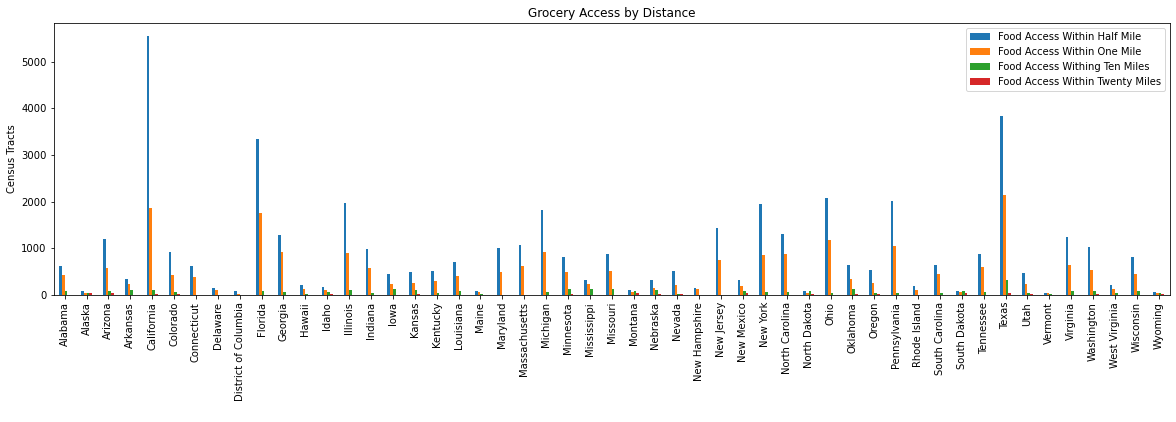

In [39]:
# plotting food access based on access for each state
food_desert_clean_state_df.plot(kind="bar", figsize=(20,5))
#Renaming legend to something that makes sense
new_legend= ["Food Access Within Half Mile", "Food Access Within One Mile","Food Access Withing Ten Miles",
                "Food Access Within Twenty Miles"]

# Set a title for the chart
plt.title("Grocery Access by Distance")
plt.xlabel(" ")
plt.ylabel("Census Tracts")
plt.legend(new_legend)
plt.savefig("../food_desserts_each_state.png")
plt.show()



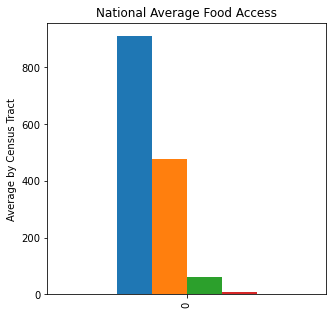

<Figure size 432x288 with 0 Axes>

In [49]:
#plotting National average for USA as Nation
food_desert_average.plot(kind="bar", figsize=(5,5), legend =None)

# Set a title for the chart
plt.title("National Average Food Access")
plt.xlabel(" ")
plt.ylabel("Average by Census Tract")
plt.savefig("../food_desserts_national_average.png")
plt.show()
plt.tight_layout()

In [43]:
#Setting state as index in dataframe
# food_desert_clean_state_df_modified =food_desert_clean_state_df.reset_index()
# food_desert_clean_state_df_modified.head()

In [44]:
# Calculating national average
average_acess = food_desert_clean_state_df.mean()
average_acess.head() 
keys_data= average_acess .keys()
keys_data

Index(['food_access_half_mile', 'food_access_one_mile', 'food_access_ten_mile',
       'food_access_twenty_mile'],
      dtype='object')

In [45]:
# Inut for state which need to be compared with national average
State_name = input("Which state would like to compare with National average ")

Which state would like to compare with National average California


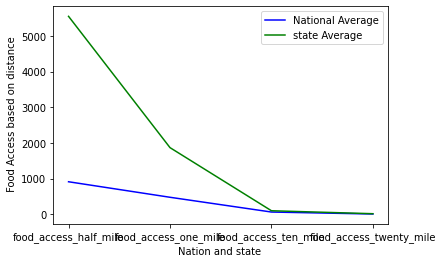

In [46]:
national_avg, = plt.plot(keys_data, average_acess, color="blue", label="National Average" )

state_one, = plt.plot(keys_data, food_desert_clean_state_df.loc[State_name,["food_access_half_mile", "food_access_one_mile", "food_access_ten_mile","food_access_twenty_mile"]], 
                        color="green", label="state Average")
plt.legend(handles=[national_avg,state_one], loc="best")
plt.xlabel("Nation and state ")
plt.ylabel(" Food Access based on distance")
plt.savefig("../food_desserts_sate_vs_nation.png")
plt.show()



In [47]:
state_access = food_desert_clean_state_df["food_access_half_mile"]
state_access

state_access_df = pd.DataFrame({'state':state_access.index, 'food_access_half_mile':state_access.values})
state_access_df

,state,food_access_half_mile
0,Alabama,616
1,Alaska,83
2,Arizona,1201
3,Arkansas,335
4,California,5551
5,Colorado,909
6,Connecticut,618
7,Delaware,155
8,District of Columbia,75
9,Florida,3336


In [48]:
#Getting state as keys from previous data set 
keys= state_access.keys()
keys

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

In [49]:
for value in state_access:
    if value > average_acess["food_access_half_mile"]:
        print("  avergae access is more")
    else:
        print("  average access is less")

  average access is less
  average access is less
  avergae access is more
  average access is less
  avergae access is more
  average access is less
  average access is less
  average access is less
  average access is less
  avergae access is more
  avergae access is more
  average access is less
  average access is less
  avergae access is more
  avergae access is more
  average access is less
  average access is less
  average access is less
  average access is less
  average access is less
  avergae access is more
  avergae access is more
  avergae access is more
  average access is less
  average access is less
  average access is less
  average access is less
  average access is less
  average access is less
  average access is less
  avergae access is more
  average access is less
  avergae access is more
  avergae access is more
  average access is less
  avergae access is more
  average access is less
  average access is less
  avergae access is more
  average access is less


In [50]:
#printing out the report which states are below average and above average
for value in state_access_df["food_access_half_mile"]:
    if value > average_acess["food_access_half_mile"]:
#         print (value)
        new_data = state_access_df.loc[state_access_df["food_access_half_mile"]==value]
        print(new_data["state"] + " Above average access")
    elif value < average_acess["food_access_half_mile"]:
        new_data_1 = state_access_df.loc[state_access_df["food_access_half_mile"]==value]
        print(new_data_1["state"] + " below average access")


0    Alabama below average access
Name: state, dtype: object
1    Alaska below average access
Name: state, dtype: object
2    Arizona Above average access
Name: state, dtype: object
3    Arkansas below average access
Name: state, dtype: object
4    California Above average access
Name: state, dtype: object
5    Colorado below average access
Name: state, dtype: object
6    Connecticut below average access
Name: state, dtype: object
7    Delaware below average access
Name: state, dtype: object
8    District of Columbia below average access
Name: state, dtype: object
9    Florida Above average access
Name: state, dtype: object
10    Georgia Above average access
Name: state, dtype: object
11    Hawaii below average access
Name: state, dtype: object
12    Idaho below average access
Name: state, dtype: object
13    Illinois Above average access
Name: state, dtype: object
14    Indiana Above average access
Name: state, dtype: object
15    Iowa below average access
Name: state, dtype: object
1